In [2]:
#https://qiita.com/damyarou/items/e152d1c601ad622446b4

import numpy as np
from scipy.stats import norm # normal distribution
from scipy import optimize
import matplotlib.pyplot as plt

import pandas as pd
from pandas import Series,DataFrame

In [3]:
dframe = pd.read_excel('cum_raw_data.xlsx', sheetname='Sheet1')

In [4]:
x = dframe['x'].values
y = dframe['y'].values

In [5]:
data_norm = norm.ppf(y, loc=0, scale=1)

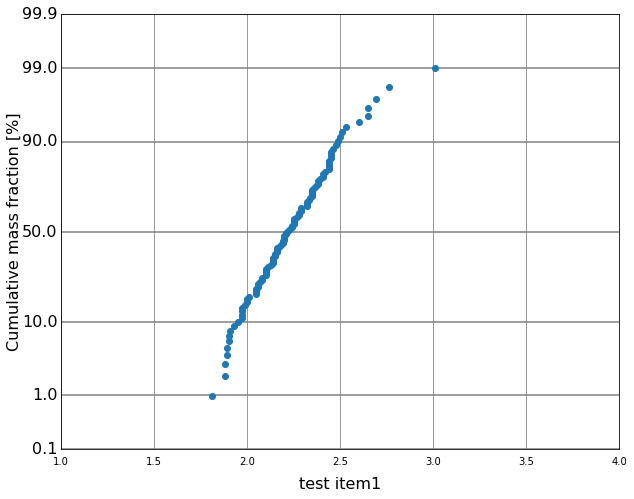

In [20]:
#==============================
# plot by matplotlib
#==============================
#font size
fs=16

# graph size
fig = plt.figure(figsize=(10,8))

#xmin=np.log10(100)
#xmax=np.log10(20000)
xmin=round(min(x)-1)
xmax=round(max(x)+1)
ymin=norm.ppf(0.001, loc=0, scale=1)
ymax=norm.ppf(0.999, loc=0, scale=1)
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])

#plt.tick_params(labelbottom='off')
plt.tick_params(labelleft='off')
plt.tick_params(which='both', width=0)

# data plot
plt.plot(x,data_norm,'o')

# straight line by regression analysis
#plt.plot([xmin, xmax], [(xmin-bb)/aa, (xmax-bb)/aa], color='k', linestyle='-', linewidth=1)

# y axis
dy_disp=np.array([0.1, 1,10,50,90,99,99.9])
_dy=np.array([0.001, 0.01,0.1,0.5,0.9,0.99,0.999])
dy=norm.ppf(_dy, loc=0, scale=1)
plt.hlines(dy, xmin, xmax, color='grey')

for i in range(0,7):
    plt.text(xmin-0.02, dy[i], str(dy_disp[i]), ha = 'right', va = 'center', fontsize=fs)
#    plt.text(xmin-0.01, dy[i], str(_dy[i]), ha = 'right', va = 'center', fontsize=fs)

# x axis
#_dx=np.array([100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,20000])
#dx=np.array([0,1,2,3,4])
#dx=np.log10(_dx)
#plt.vlines(dx, ymin, ymax, color='grey')
plt.grid(which='major', axis='x', color='grey',linestyle='-')

#for i in range(0,6):
#    plt.text(float(i), ymin-0.1, str(i), ha = 'center', va = 'top', fontsize=fs)
#    plt.text(float(i), ymin-0.1, str(10**i), ha = 'center', va = 'top', fontsize=fs)



plt.text(0.5*(xmin+xmax), ymin-0.5, 'test item1', ha = 'center', va = 'center', fontsize=fs)

plt.text(xmin-0.25,0.5*(ymin+ymax),'Cumulative mass fraction [%]', ha = 'center', va = 'center', fontsize=fs, rotation=90)

# image saving
plt.savefig('fig_flood_p.png', bbox_inches="tight", pad_inches=0.2)

#show
plt.show()